In [20]:
import os
import sys
import random
from collections import Counter
from string import punctuation

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

import email
import statistics

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import spacy

import emot
from wordcloud import WordCloud, STOPWORDS

# machine learning
from sklearn import cross_validation
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [21]:
import features
# functions are writen in features.py file
import extract_email_info 
# function is writen in extract_email_info.py file

In [22]:
nlp = spacy.load('en')

## Collect data

In [24]:
# Read the data into a DataFrame
emails_df = pd.read_csv('../data/emails.csv')
emails_df.head(1)

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...


## Message analysis

### Using Email Module to analysis email messages.
- from Kaggle JayKrishna 's Kernel: Topic Modeling Enron Email Dataset. 
- takes around 10 mins 

In [ ]:
extract_email_info.extract_info(emails_df)

### To avoid repeat computation, store result dataframe to csv file.

In [ ]:
# complete data after progress is stored in to an csv file.
emails_df.to_csv("../data/email_info.csv", index=False)

In [25]:
email_tmp = pd.read_csv('../data/email_info.csv')
email_tmp.head()

,file,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,content,user
0,allen-p/_sent_mail/1.,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",frozenset({'phillip.allen@enron.com'}),frozenset({'tim.belden@enron.com'}),NaN,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,NaN,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Here is our forecast\n\n,allen-p
1,allen-p/_sent_mail/10.,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",frozenset({'phillip.allen@enron.com'}),frozenset({'john.lavorato@enron.com'}),Re:,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,NaN,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Traveling to have a business meeting takes the...,allen-p
2,allen-p/_sent_mail/100.,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",frozenset({'phillip.allen@enron.com'}),frozenset({'leah.arsdall@enron.com'}),Re: test,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Leah Van Arsdall,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,test successful. way to go!!!,allen-p
3,allen-p/_sent_mail/1000.,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",frozenset({'phillip.allen@enron.com'}),frozenset({'randall.gay@enron.com'}),NaN,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Randall L Gay,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,"Randy,\n\n Can you send me a schedule of the s...",allen-p
4,allen-p/_sent_mail/1001.,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",frozenset({'phillip.allen@enron.com'}),frozenset({'greg.piper@enron.com'}),Re: Hello,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Greg Piper,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,Let's shoot for Tuesday at 11:45.,allen-p


In [26]:
# Check if all data in included
email_tmp.shape

(517401, 18)

In [27]:
emails_df = email_tmp

## Understand Data

#### Check how data are distributed

In [28]:
emails_df["user"].describe()

count         517401
unique           150
top       kaminski-v
freq           28465
Name: user, dtype: object

In [29]:
emails_df.groupby(['user']).count()['From']


user
allen-p            3034
arnold-j           4898
arora-h             654
badeer-r            877
bailey-s            478
bass-e             7823
baughman-d         2760
beck-s            11830
benson-r            767
blair-l            3415
brawner-s          1026
buy-r              2429
campbell-l         6490
carson-m           1400
cash-m             2969
causholli-m         943
corman-s           2025
crandell-s          519
cuilla-m           1029
dasovich-j        28234
davis-d            2249
dean-c             2429
delainey-d         3566
derrick-j          1766
dickson-s           395
donoho-l           1045
donohoe-t          1015
dorland-c          2127
ermis-f            1230
farmer-d          13032
                  ...  
smith-m            1642
solberg-g          1081
south-s             248
staab-t             621
stclair-c          3030
steffes-j          3331
stepenovitch-j     1227
stokley-c          1252
storey-g           1027
sturm-f            1169
swerzbin-m 

In [30]:
# have a look at how many email address are used by one user 
emails_df.loc[emails_df['user'] == "dasovich-j", 'From'].unique()

array(["frozenset({'dhunter@smithandkempton.com'})",
       "frozenset({'perfmgmt@enron.com'})",
       "frozenset({'paul.kaufman@enron.com'})", ...,
       "frozenset({'chris.dcouto@novellus.com'})",
       "frozenset({'dgrueneich@gralegal.com'})",
       "frozenset({'pds6@pge.com'})"], dtype=object)

#### check the distribution of the number of emails 

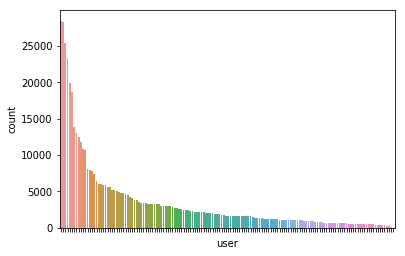

In [31]:
ax = sns.countplot(x='user', data=emails_df, order = emails_df['user'].value_counts().index)
ax.set(xticklabels=[])
plt.show()

In [32]:
# get an idea about how many people send more than 10000 emials, and how many emails did they send in total.
email_count = emails_df['user'].value_counts()
ten_thousand_plus = email_count[email_count > 10000]
print (len(ten_thousand_plus))
len(emails_df.groupby('user').filter(lambda x: len(x) >10000))

12


216723

####  527372 emails from 27980 email address and from 150 people, there are 12 people send over 10000 emails, I will only work on those data(216723 emails in total). "user" can be used as the golden standard,  "content" will be analysed below, rest columns are not needed.

In [33]:
emails_df_10000 = emails_df.groupby('user').filter(lambda x: len(x) >10000)

In [34]:
print(emails_df_10000.shape)

(216723, 18)


## Basic Natural Language Processing tasks
### Three basic tasks are performed below with one sample from data

### Sentence splitting

In [35]:
test_sentences = emails_df_10000['content'].iloc[12]

doc = nlp(test_sentences)

In [36]:
sents = []
for span in doc.sents:
    sent = ''.join(doc[i].string for i in range(span.start, span.end)).strip()
    sents.append(sent)
print(len(sents),"sentences")
for sentence in sents:
    print(sentence,len(sentence.split()))

17 sentences
Jeff, thanks for taking care of this for Fred. 9
--Sally 




Jeffrey C Gossett 4
01/10/2001 1
11:39 AM 2
To: 1
Timothy M Norton/HOU/ECT@ECT, Matthew Condon/NA/Enron@ENRON 5
, Tracy 
Beardmore/NA/Enron@Enron, Joyce Kuo/NA/Enron@Enron, Stewart 6
Range/NA/Enron@ENRON, John Swinney/HOU/ECT@ECT, Michelle 
Nelson/Corp/Enron@ENRON, Jeremy Mills/Corp/ 7
Enron@ENRON, John D 
Postlethwaite/CAL/ECT@ECT, Casey Evans/Corp/Enron@Enron, Valarie 
Sabo/PDX/ECT@ECT, Kam Keiser/HOU/ECT@ECT, Darron C Giron/HOU/ECT@ECT, David 
Baumbach/HOU/ECT@ECT, Errol McLaughlin/Corp/Enron@ENRON, Phillip M 
Love/HOU/ECT@ECT, Kathy Reeves/CAL/ECT@ECT, Brian Gillis/CAL/ECT@ECT
cc: Michelle Bruce/HOU/ECT@ECT, Stacey W White/HOU/ECT@ECT, Sheila 31
Glover/HOU/ECT@ECT, Sally Beck/HOU/ECT@ECT 
Subject: 4
Lagrasta Origination 2
I appreciate everyone's help in making sure that all the information for 
Lagrasta's originated is deals is accurate. 18
He is now receiving a daily 
report with all originated deals. 11
He

### Tokenization POS-tagging Lemmatization

In [37]:
for token in doc:
    print(token.orth_, token.pos_, token.lemma_)

Jeff PROPN jeff
, PUNCT ,
thanks NOUN thank
for ADP for
taking VERB take
care NOUN care
of ADP of
this DET this
for ADP for
Fred PROPN fred
. PUNCT .
--Sally ADV --sally





 SPACE 





Jeffrey PROPN jeffrey
C PROPN c
Gossett PROPN gossett

 SPACE 

01/10/2001 NUM 01/10/2001
11:39 NUM 11:39
AM NOUN am

 SPACE 

To ADP to
: PUNCT :
Timothy PROPN timothy
M PROPN m
Norton PROPN norton
/ SYM /
HOU PROPN hou
/ SYM /
ECT@ECT PROPN ect@ect
, PUNCT ,
Matthew PROPN matthew
Condon PROPN condon
/ SYM /
NA PROPN na
/ SYM /
Enron@ENRON PROPN enron@enron
, PUNCT ,
Tracy PROPN tracy

 SPACE 

Beardmore PROPN beardmore
/ SYM /
NA PROPN na
/ SYM /
Enron@Enron PROPN enron@enron
, PUNCT ,
Joyce PROPN joyce
Kuo PROPN kuo
/ SYM /
NA PROPN na
/ SYM /
Enron@Enron PROPN enron@enron
, PUNCT ,
Stewart PROPN stewart

 SPACE 

Range PROPN range
/ SYM /
NA PROPN na
/ SYM /
Enron@ENRON PROPN enron@enron
, PUNCT ,
John PROPN john
Swinney PROPN swinney
/ SYM /
HOU PROPN hou
/ SYM /
ECT@ECT PROPN ect@ect
, PUNCT ,
M

### Named Entity Recognition

In [38]:
i = 0
for token in doc:
    i +=1
    print(i, token.orth_, token.ent_type_ if token.ent_type_ != "" else "(not an entity)")

print("-------------- entities only ---------------")
ents = list(doc.ents)
for entity in ents:
    print(entity.label, entity.label_, ' '.join(t.orth_ for t in entity))

1 Jeff PERSON
2 , (not an entity)
3 thanks (not an entity)
4 for (not an entity)
5 taking (not an entity)
6 care (not an entity)
7 of (not an entity)
8 this (not an entity)
9 for (not an entity)
10 Fred (not an entity)
11 . (not an entity)
12 --Sally (not an entity)
13 




 ORG
14 Jeffrey (not an entity)
15 C (not an entity)
16 Gossett (not an entity)
17 
 (not an entity)
18 01/10/2001 (not an entity)
19 11:39 (not an entity)
20 AM (not an entity)
21 
 GPE
22 To (not an entity)
23 : (not an entity)
24 Timothy PERSON
25 M PERSON
26 Norton PERSON
27 / (not an entity)
28 HOU ORG
29 / (not an entity)
30 ECT@ECT (not an entity)
31 , (not an entity)
32 Matthew PERSON
33 Condon PERSON
34 / (not an entity)
35 NA ORG
36 / ORG
37 Enron@ENRON ORG
38 , (not an entity)
39 Tracy ORG
40 
 ORG
41 Beardmore ORG
42 / ORG
43 NA ORG
44 / ORG
45 Enron@Enron ORG
46 , (not an entity)
47 Joyce PERSON
48 Kuo PERSON
49 / PERSON
50 NA PERSON
51 / PERSON
52 Enron@Enron PERSON
53 , (not an entity)
54 Stewart ORG


## features.py extract statistics (features) from files, will be used below

## Store the computed statistics in a useful format

In [39]:
df = emails_df_10000[["Message-ID", "content", "user"]]

In [40]:
# randomly select 1000 sample email for each author.
df_1000 = df.groupby('user').apply(lambda df: df.sample(1000)) 

In [41]:
df_1000[990:1010]


Message-ID  \
user                                                              
beck-s     26788  <32660090.1075855861137.JavaMail.evans@thyme>   
           23201  <32085240.1075855804590.JavaMail.evans@thyme>   
           24849  <16408715.1075855815214.JavaMail.evans@thyme>   
           30134  <11593199.1075855889870.JavaMail.evans@thyme>   
           21451  <19197681.1075855914662.JavaMail.evans@thyme>   
           21053  <14510219.1075855923830.JavaMail.evans@thyme>   
           24050   <8871938.1075849820467.JavaMail.evans@thyme>   
           22758  <13705501.1075855794582.JavaMail.evans@thyme>   
           23421  <17471645.1075855809705.JavaMail.evans@thyme>   
           26087  <33197644.1075855844194.JavaMail.evans@thyme>   
dasovich-j 72499  <23339501.1075843098140.JavaMail.evans@thyme>   
           69961    <207781.1075851651526.JavaMail.evans@thyme>   
           71104  <16020273.1075849379801.JavaMail.evans@thyme>   
           56944  <22245220.1075843438358.JavaMail.evans@thyme>   
           83089   <1583111.1075843197116.JavaMail.evans@thyme>   
           58913  <23240911.1075843542392.JavaMail.evans@thyme>   
           57729  <27439900.1075843467312.JavaMail.evans@thyme>   
           70306  <27996443.1075851663293.JavaMail.evans@thyme>   
           77911    <212768.1075843118184.JavaMail.evans@thyme>   
           57897  <20742317.1075843477212.JavaMail.evans@thyme>   

                                                            content  \
user                                                                  
beck-s     26788  To my surprise, I was chosen today to sit on a...   
           23201  Hi,  How is everyone doing?  Busy , Busy, Busy...   
           24849  Recap of my discussion with Heidi:\n\n All Con...   
           30134  Sally,\n\nWe need to start hiring asap. We'd l...   
           21451  I have only taken a quick look at the attachme...   
           21053  Thanks for your note.  Between meetings today,...   
           24050  Sally, \nWe will forward a detailed report for...   
           22758  You might hear of this, so I thought I better ...   
           23421  The following new hire Analysts (commercial si...   
           26087  As presented to Causey last Friday.\n.\n\n\n\n...   
dasovich-j 72499  Summary of Davis/Alpert bill:\n\n1.  Retro-act...   
           69961  PG&E Gas Accord--$10K\nPUC proceeding to consi...   
           71104  A conference call has been set up for Wednesda...   
           56944  You have specific questions about the order?  ...   
           83089  Seems that we could provide Lay/Skilling with ...   
           58913  Please forward to anyone else who might be int...   
           57729  Walsh, Kristin would like to recall the messag...   
           70306  yes please...\n\nThank you Jeff\n\nDan\n\n\n\n...   
           77911  Now I'm not going to turn into your Bruno by s...   
           57897  Hi Alan:\n\nIn our ongoing analysis of the MOU...   

                        user  
user                          
beck-s     26788      beck-s  
           23201      beck-s  
           24849      beck-s  
           30134      beck-s  
           21451      beck-s  
           21053      beck-s  
           24050      beck-s  
           22758      beck-s  
           23421      beck-s  
           26087      beck-s  
dasovich-j 72499  dasovich-j  
           69961  dasovich-j  
           71104  dasovich-j  
           56944  dasovich-j  
           83089  dasovich-j  
           58913  dasovich-j  
           57729  dasovich-j  
           70306  dasovich-j  
           77911  dasovich-j  
           57897  dasovich-j

### Have a look at word cloud for diffrent user

In [42]:
beck_s = df_1000[df_1000.user=="beck-s"]["content"].values
shackletons = df_1000[df_1000.user=="shackleton-s"]["content"].values

(-0.5, 399.5, 199.5, -0.5)

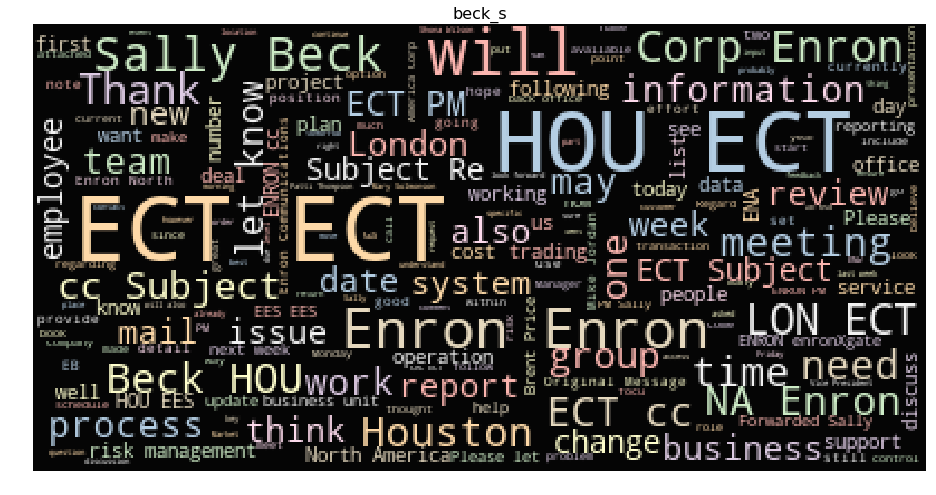

In [43]:
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="black", max_words=10000, 
               stopwords=STOPWORDS, max_font_size= 40)
wc.generate(" ".join(beck_s))
plt.title("beck_s", fontsize=16)
plt.imshow(wc.recolor( colormap= 'Pastel1_r' , random_state=17), alpha=0.98)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

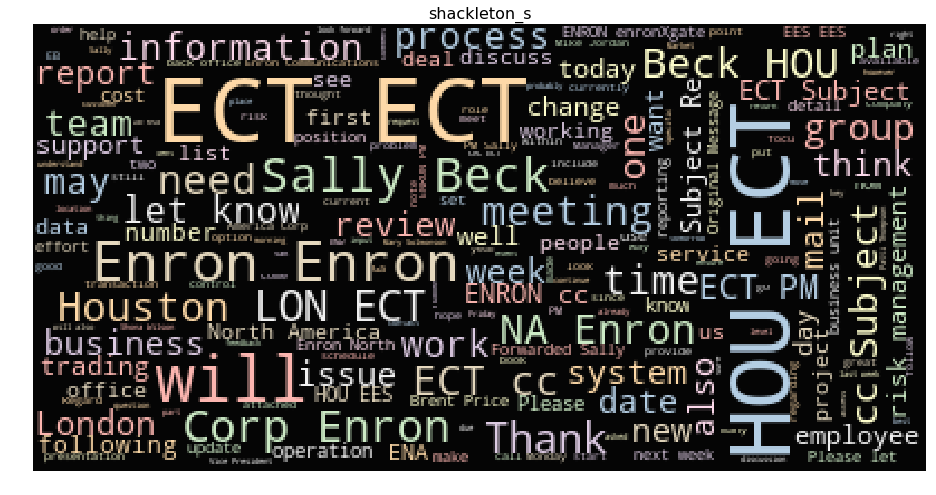

In [44]:
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="black", max_words=10000, 
               stopwords=STOPWORDS, max_font_size= 40)
wc.generate(" ".join(beck_s))
plt.title("shackleton_s", fontsize=16)
plt.imshow(wc.recolor( colormap= 'Pastel1_r' , random_state=17), alpha=0.98)
plt.axis('off')

In [45]:
# Get doc structure for every sample. 
# NOTE:  this step will take around 1 hour.

df_1000["doc"] = df_1000.content.apply(nlp) # get doc structure for every sample, this step will take around 1 hour.


KeyboardInterrupt: 

In [46]:
df_1000.describe()



,Message-ID,content,user
count,12000,12000,12000
unique,12000,11298,12
top,<26727749.1075853678835.JavaMail.evans@thyme>,We are making a number of significant organiza...,kaminski-v
freq,1,4,1000


### Save dataframe to pickle file, because of size and doc structure, it can't be saved into csv, and also too big for into one single file

In [ ]:
df_1000[:3000].to_pickle("../data/emails_df_1000_12_tmp1.pkl")
df_1000[3000:6000].to_pickle("../data/emails_df_1000_12_tmp2.pkl")
df_1000[6000:9000].to_pickle("../data/emails_df_1000_12_tmp3.pkl")
df_1000[9000:].to_pickle("../data/emails_df_1000_12_tmp4.pkl")

In [47]:
df1 = pd.read_pickle("../data/emails_df_1000_12_tmp1.pkl")
df2 = pd.read_pickle("../data/emails_df_1000_12_tmp2.pkl")
df3 = pd.read_pickle("../data/emails_df_1000_12_tmp3.pkl")
df4 = pd.read_pickle("../data/emails_df_1000_12_tmp4.pkl")
print(df1.head())
print(df2.head())
print(df3.head())

                                                 Message-ID  \
user                                                          
beck-s 31526   <8253436.1075855906483.JavaMail.evans@thyme>   
       31409   <8337492.1075855904083.JavaMail.evans@thyme>   
       24746   <8917002.1075855767799.JavaMail.evans@thyme>   
       25583   <9181139.1075855832794.JavaMail.evans@thyme>   
       25655  <17294707.1075855834331.JavaMail.evans@thyme>   

                                                        content    user  \
user                                                                      
beck-s 31526  I will be out of the office after noon on Frid...  beck-s   
       31409  Can you join me at this meeting?  I plan to ta...  beck-s   
       24746  Sally - Plse see the attached summary that Ris...  beck-s   
       25583  Sally:\n\nBelow is the detail of what the "ext...  beck-s   
       25655  Ditto.  \n---------------------- Forwarded by ...  beck-s   

                                

In [48]:
frames = [df1, df2, df3, df4]

df_1000_12 = pd.concat(frames)

In [49]:
print(df_1000_12.head())

                                                 Message-ID  \
user                                                          
beck-s 31526   <8253436.1075855906483.JavaMail.evans@thyme>   
       31409   <8337492.1075855904083.JavaMail.evans@thyme>   
       24746   <8917002.1075855767799.JavaMail.evans@thyme>   
       25583   <9181139.1075855832794.JavaMail.evans@thyme>   
       25655  <17294707.1075855834331.JavaMail.evans@thyme>   

                                                        content    user  \
user                                                                      
beck-s 31526  I will be out of the office after noon on Frid...  beck-s   
       31409  Can you join me at this meeting?  I plan to ta...  beck-s   
       24746  Sally - Plse see the attached summary that Ris...  beck-s   
       25583  Sally:\n\nBelow is the detail of what the "ext...  beck-s   
       25655  Ditto.  \n---------------------- Forwarded by ...  beck-s   

                                

###  Add features into dataframe

In [50]:
df_1000_12 = df_1000_12.join(df_1000_12.doc.apply(features.sentence_based_features))

df_1000_12.head()

Message-ID  \
user                                                          
beck-s 31526   <8253436.1075855906483.JavaMail.evans@thyme>   
       31409   <8337492.1075855904083.JavaMail.evans@thyme>   
       24746   <8917002.1075855767799.JavaMail.evans@thyme>   
       25583   <9181139.1075855832794.JavaMail.evans@thyme>   
       25655  <17294707.1075855834331.JavaMail.evans@thyme>   

                                                        content    user  \
user                                                                      
beck-s 31526  I will be out of the office after noon on Frid...  beck-s   
       31409  Can you join me at this meeting?  I plan to ta...  beck-s   
       24746  Sally - Plse see the attached summary that Ris...  beck-s   
       25583  Sally:\n\nBelow is the detail of what the "ext...  beck-s   
       25655  Ditto.  \n---------------------- Forwarded by ...  beck-s   

                                                            doc  \
user                                                              
beck-s 31526  (I, will, be, out, of, the, office, after, noo...   
       31409  (Can, you, join, me, at, this, meeting, ?,  , ...   
       24746  (Sally, -, Plse, see, the, attached, summary, ...   
       25583  (Sally, :, \n\n, Below, is, the, detail, of, w...   
       25655  (Ditto, .,  \n, ----------------------, Forwar...   

              avg_nr_word_per_sent  nr_sents  std_nr_word_per_sent  
user                                                                
beck-s 31526             17.250000       4.0              9.878428  
       31409             21.526316      19.0             49.298826  
       24746             19.172414      29.0             12.050693  
       25583             10.114583      96.0              8.392816  
       25655             16.285714      14.0             15.329351

In [51]:
df_1000_12 = df_1000_12.join(df_1000_12.doc.apply(features.character_based_features))
df_1000_12.head()

Message-ID  \
user                                                          
beck-s 31526   <8253436.1075855906483.JavaMail.evans@thyme>   
       31409   <8337492.1075855904083.JavaMail.evans@thyme>   
       24746   <8917002.1075855767799.JavaMail.evans@thyme>   
       25583   <9181139.1075855832794.JavaMail.evans@thyme>   
       25655  <17294707.1075855834331.JavaMail.evans@thyme>   

                                                        content    user  \
user                                                                      
beck-s 31526  I will be out of the office after noon on Frid...  beck-s   
       31409  Can you join me at this meeting?  I plan to ta...  beck-s   
       24746  Sally - Plse see the attached summary that Ris...  beck-s   
       25583  Sally:\n\nBelow is the detail of what the "ext...  beck-s   
       25655  Ditto.  \n---------------------- Forwarded by ...  beck-s   

                                                            doc  \
user                                                              
beck-s 31526  (I, will, be, out, of, the, office, after, noo...   
       31409  (Can, you, join, me, at, this, meeting, ?,  , ...   
       24746  (Sally, -, Plse, see, the, attached, summary, ...   
       25583  (Sally, :, \n\n, Below, is, the, detail, of, w...   
       25655  (Ditto, .,  \n, ----------------------, Forwar...   

              avg_nr_word_per_sent  nr_sents  std_nr_word_per_sent  nr_chars  \
user                                                                           
beck-s 31526             17.250000       4.0              9.878428       224   
       31409             21.526316      19.0             49.298826      1514   
       24746             19.172414      29.0             12.050693      2147   
       25583             10.114583      96.0              8.392816      3816   
       25655             16.285714      14.0             15.329351      1008   

              nr_letters  nr_lower  nr_nums  nr_punctuation  nr_spaces  \
user                                                                     
beck-s 31526         196       190       11               9          8   
       31409        1199       815       65             206         44   
       24746        1760      1585       56             146        185   
       25583        2675      2176      222             479        440   
       25655         747       657       33              95        133   

              nr_upper  
user                    
beck-s 31526         6  
       31409       384  
       24746       175  
       25583       499  
       25655        90

In [52]:
df_1000_12 = df_1000_12.join(df_1000_12.doc.apply(features.punctuationr_based_features))
df_1000_12.head()

Message-ID  \
user                                                          
beck-s 31526   <8253436.1075855906483.JavaMail.evans@thyme>   
       31409   <8337492.1075855904083.JavaMail.evans@thyme>   
       24746   <8917002.1075855767799.JavaMail.evans@thyme>   
       25583   <9181139.1075855832794.JavaMail.evans@thyme>   
       25655  <17294707.1075855834331.JavaMail.evans@thyme>   

                                                        content    user  \
user                                                                      
beck-s 31526  I will be out of the office after noon on Frid...  beck-s   
       31409  Can you join me at this meeting?  I plan to ta...  beck-s   
       24746  Sally - Plse see the attached summary that Ris...  beck-s   
       25583  Sally:\n\nBelow is the detail of what the "ext...  beck-s   
       25655  Ditto.  \n---------------------- Forwarded by ...  beck-s   

                                                            doc  \
user                                                              
beck-s 31526  (I, will, be, out, of, the, office, after, noo...   
       31409  (Can, you, join, me, at, this, meeting, ?,  , ...   
       24746  (Sally, -, Plse, see, the, attached, summary, ...   
       25583  (Sally, :, \n\n, Below, is, the, detail, of, w...   
       25655  (Ditto, .,  \n, ----------------------, Forwar...   

              avg_nr_word_per_sent  nr_sents  std_nr_word_per_sent  nr_chars  \
user                                                                           
beck-s 31526             17.250000       4.0              9.878428       224   
       31409             21.526316      19.0             49.298826      1514   
       24746             19.172414      29.0             12.050693      2147   
       25583             10.114583      96.0              8.392816      3816   
       25655             16.285714      14.0             15.329351      1008   

              nr_letters  nr_lower      ...        nr_punctuation  nr_spaces  \
user                                    ...                                    
beck-s 31526         196       190      ...                     9          8   
       31409        1199       815      ...                   206         44   
       24746        1760      1585      ...                   146        185   
       25583        2675      2176      ...                   479        440   
       25655         747       657      ...                    95        133   

              nr_upper  nr_colons  nr_commas  nr_dots  nr_exclamation  \
user                                                                    
beck-s 31526         6          0          4        3               0   
       31409       384          5         31        6               1   
       24746       175          8         15       16               0   
       25583       499         49         16       22               0   
       25655        90         17          3        5               0   

              nr_hyphens  nr_question  nr_semicolons  
user                                                  
beck-s 31526           2            0              0  
       31409           5            1              0  
       24746           4            8              0  
       25583           1            7              0  
       25655           1            0              0  

[5 rows x 21 columns]

In [53]:
df_1000_12 = df_1000_12.join(df_1000_12.doc.apply(features.word_based_features))
df_1000_12.head()

Message-ID  \
user                                                          
beck-s 31526   <8253436.1075855906483.JavaMail.evans@thyme>   
       31409   <8337492.1075855904083.JavaMail.evans@thyme>   
       24746   <8917002.1075855767799.JavaMail.evans@thyme>   
       25583   <9181139.1075855832794.JavaMail.evans@thyme>   
       25655  <17294707.1075855834331.JavaMail.evans@thyme>   

                                                        content    user  \
user                                                                      
beck-s 31526  I will be out of the office after noon on Frid...  beck-s   
       31409  Can you join me at this meeting?  I plan to ta...  beck-s   
       24746  Sally - Plse see the attached summary that Ris...  beck-s   
       25583  Sally:\n\nBelow is the detail of what the "ext...  beck-s   
       25655  Ditto.  \n---------------------- Forwarded by ...  beck-s   

                                                            doc  \
user                                                              
beck-s 31526  (I, will, be, out, of, the, office, after, noo...   
       31409  (Can, you, join, me, at, this, meeting, ?,  , ...   
       24746  (Sally, -, Plse, see, the, attached, summary, ...   
       25583  (Sally, :, \n\n, Below, is, the, detail, of, w...   
       25655  (Ditto, .,  \n, ----------------------, Forwar...   

              avg_nr_word_per_sent  nr_sents  std_nr_word_per_sent  nr_chars  \
user                                                                           
beck-s 31526             17.250000       4.0              9.878428       224   
       31409             21.526316      19.0             49.298826      1514   
       24746             19.172414      29.0             12.050693      2147   
       25583             10.114583      96.0              8.392816      3816   
       25655             16.285714      14.0             15.329351      1008   

              nr_letters  nr_lower    ...     nr_question  nr_semicolons  \
user                                  ...                                  
beck-s 31526         196       190    ...               0              0   
       31409        1199       815    ...               1              0   
       24746        1760      1585    ...               8              0   
       25583        2675      2176    ...               7              0   
       25655         747       657    ...               0              0   

                   HTR       TTR  avg_characters_per_word  most_frequency  \
user                                                                        
beck-s 31526  0.520000  0.720000                 3.920000             4.0   
       31409  0.537736  0.674528                 4.466981            22.0   
       24746  0.376263  0.540404                 4.320707            13.0   
       25583  0.216667  0.361667                 4.191667            22.0   
       25655  0.591241  0.744526                 5.416058             8.0   

              nr_error  nr_longwords  nr_stopwords  nr_words  
user                                                          
beck-s 31526       0.0          12.0          27.0      50.0  
       31409       0.0          62.0          51.0     212.0  
       24746       0.0         113.0         167.0     396.0  
       25583       0.0         129.0         198.0     600.0  
       25655       0.0          64.0          39.0     137.0  

[5 rows x 29 columns]

In [54]:
df_1000_12 = df_1000_12.join(df_1000_12.doc.apply(features.syntactic_features))
df_1000_12.head()

Message-ID  \
user                                                          
beck-s 31526   <8253436.1075855906483.JavaMail.evans@thyme>   
       31409   <8337492.1075855904083.JavaMail.evans@thyme>   
       24746   <8917002.1075855767799.JavaMail.evans@thyme>   
       25583   <9181139.1075855832794.JavaMail.evans@thyme>   
       25655  <17294707.1075855834331.JavaMail.evans@thyme>   

                                                        content    user  \
user                                                                      
beck-s 31526  I will be out of the office after noon on Frid...  beck-s   
       31409  Can you join me at this meeting?  I plan to ta...  beck-s   
       24746  Sally - Plse see the attached summary that Ris...  beck-s   
       25583  Sally:\n\nBelow is the detail of what the "ext...  beck-s   
       25655  Ditto.  \n---------------------- Forwarded by ...  beck-s   

                                                            doc  \
user                                                              
beck-s 31526  (I, will, be, out, of, the, office, after, noo...   
       31409  (Can, you, join, me, at, this, meeting, ?,  , ...   
       24746  (Sally, -, Plse, see, the, attached, summary, ...   
       25583  (Sally, :, \n\n, Below, is, the, detail, of, w...   
       25655  (Ditto, .,  \n, ----------------------, Forwar...   

              avg_nr_word_per_sent  nr_sents  std_nr_word_per_sent  nr_chars  \
user                                                                           
beck-s 31526             17.250000       4.0              9.878428       224   
       31409             21.526316      19.0             49.298826      1514   
       24746             19.172414      29.0             12.050693      2147   
       25583             10.114583      96.0              8.392816      3816   
       25655             16.285714      14.0             15.329351      1008   

              nr_letters  nr_lower   ...         TTR  avg_characters_per_word  \
user                                 ...                                        
beck-s 31526         196       190   ...    0.720000                 3.920000   
       31409        1199       815   ...    0.674528                 4.466981   
       24746        1760      1585   ...    0.540404                 4.320707   
       25583        2675      2176   ...    0.361667                 4.191667   
       25655         747       657   ...    0.744526                 5.416058   

              most_frequency  nr_error  nr_longwords  nr_stopwords  nr_words  \
user                                                                           
beck-s 31526             4.0       0.0          12.0          27.0      50.0   
       31409            22.0       0.0          62.0          51.0     212.0   
       24746            13.0       0.0         113.0         167.0     396.0   
       25583            22.0       0.0         129.0         198.0     600.0   
       25655             8.0       0.0          64.0          39.0     137.0   

              avg_length_np  nr_function  nr_pos  
user                                              
beck-s 31526       7.857143         21.0    14.0  
       31409      11.446809         44.0    16.0  
       24746      10.201835        132.0    17.0  
       25583       9.891192        174.0    16.0  
       25655      15.307692         36.0    15.0  

[5 rows x 32 columns]

In [55]:
df_1000_12 = df_1000_12.join(df_1000_12.doc.apply(features.semantic_features))
df_1000_12.head()

Message-ID  \
user                                                          
beck-s 31526   <8253436.1075855906483.JavaMail.evans@thyme>   
       31409   <8337492.1075855904083.JavaMail.evans@thyme>   
       24746   <8917002.1075855767799.JavaMail.evans@thyme>   
       25583   <9181139.1075855832794.JavaMail.evans@thyme>   
       25655  <17294707.1075855834331.JavaMail.evans@thyme>   

                                                        content    user  \
user                                                                      
beck-s 31526  I will be out of the office after noon on Frid...  beck-s   
       31409  Can you join me at this meeting?  I plan to ta...  beck-s   
       24746  Sally - Plse see the attached summary that Ris...  beck-s   
       25583  Sally:\n\nBelow is the detail of what the "ext...  beck-s   
       25655  Ditto.  \n---------------------- Forwarded by ...  beck-s   

                                                            doc  \
user                                                              
beck-s 31526  (I, will, be, out, of, the, office, after, noo...   
       31409  (Can, you, join, me, at, this, meeting, ?,  , ...   
       24746  (Sally, -, Plse, see, the, attached, summary, ...   
       25583  (Sally, :, \n\n, Below, is, the, detail, of, w...   
       25655  (Ditto, .,  \n, ----------------------, Forwar...   

              avg_nr_word_per_sent  nr_sents  std_nr_word_per_sent  nr_chars  \
user                                                                           
beck-s 31526             17.250000       4.0              9.878428       224   
       31409             21.526316      19.0             49.298826      1514   
       24746             19.172414      29.0             12.050693      2147   
       25583             10.114583      96.0              8.392816      3816   
       25655             16.285714      14.0             15.329351      1008   

              nr_letters  nr_lower        ...         nr_error  nr_longwords  \
user                                      ...                                  
beck-s 31526         196       190        ...              0.0          12.0   
       31409        1199       815        ...              0.0          62.0   
       24746        1760      1585        ...              0.0         113.0   
       25583        2675      2176        ...              0.0         129.0   
       25655         747       657        ...              0.0          64.0   

              nr_stopwords  nr_words  avg_length_np  nr_function  nr_pos  \
user                                                                       
beck-s 31526          27.0      50.0       7.857143         21.0    14.0   
       31409          51.0     212.0      11.446809         44.0    16.0   
       24746         167.0     396.0      10.201835        132.0    17.0   
       25583         198.0     600.0       9.891192        174.0    16.0   
       25655          39.0     137.0      15.307692         36.0    15.0   

              nr_named_entity  nr_neg_word  nr_positive_word  
user                                                          
beck-s 31526               15            0                 0  
       31409              193            0                 1  
       24746              151            0                 2  
       25583              342            0                 0  
       25655               80            0                 0  

[5 rows x 35 columns]

### Added one feature as nr_greeting words after presentation

In [56]:
df_1000_12 = df_1000_12.join(df_1000_12.content.apply(features.semantic_features_content))
df_1000_12.head()

Message-ID  \
user                                                          
beck-s 31526   <8253436.1075855906483.JavaMail.evans@thyme>   
       31409   <8337492.1075855904083.JavaMail.evans@thyme>   
       24746   <8917002.1075855767799.JavaMail.evans@thyme>   
       25583   <9181139.1075855832794.JavaMail.evans@thyme>   
       25655  <17294707.1075855834331.JavaMail.evans@thyme>   

                                                        content    user  \
user                                                                      
beck-s 31526  I will be out of the office after noon on Frid...  beck-s   
       31409  Can you join me at this meeting?  I plan to ta...  beck-s   
       24746  Sally - Plse see the attached summary that Ris...  beck-s   
       25583  Sally:\n\nBelow is the detail of what the "ext...  beck-s   
       25655  Ditto.  \n---------------------- Forwarded by ...  beck-s   

                                                            doc  \
user                                                              
beck-s 31526  (I, will, be, out, of, the, office, after, noo...   
       31409  (Can, you, join, me, at, this, meeting, ?,  , ...   
       24746  (Sally, -, Plse, see, the, attached, summary, ...   
       25583  (Sally, :, \n\n, Below, is, the, detail, of, w...   
       25655  (Ditto, .,  \n, ----------------------, Forwar...   

              avg_nr_word_per_sent  nr_sents  std_nr_word_per_sent  nr_chars  \
user                                                                           
beck-s 31526             17.250000       4.0              9.878428       224   
       31409             21.526316      19.0             49.298826      1514   
       24746             19.172414      29.0             12.050693      2147   
       25583             10.114583      96.0              8.392816      3816   
       25655             16.285714      14.0             15.329351      1008   

              nr_letters  nr_lower       ...        nr_words  avg_length_np  \
user                                     ...                                  
beck-s 31526         196       190       ...            50.0       7.857143   
       31409        1199       815       ...           212.0      11.446809   
       24746        1760      1585       ...           396.0      10.201835   
       25583        2675      2176       ...           600.0       9.891192   
       25655         747       657       ...           137.0      15.307692   

              nr_function  nr_pos  nr_named_entity  nr_neg_word  \
user                                                              
beck-s 31526         21.0    14.0               15            0   
       31409         44.0    16.0              193            0   
       24746        132.0    17.0              151            0   
       25583        174.0    16.0              342            0   
       25655         36.0    15.0               80            0   

              nr_positive_word  nr_emoticons  nr_greeting  score_semantic  
user                                                                       
beck-s 31526                 0           3.0          0.0          0.0258  
       31409                 1           1.0          0.0          0.9020  
       24746                 2           4.0          0.0          0.9634  
       25583                 0          10.0          0.0          0.9764  
       25655                 0           3.0          0.0          0.9360  

[5 rows x 38 columns]

In [57]:
# emot doesn't work as expected, this feature will be removed
s = str(df_1000_12['content'][4])
print (emot.emoticons(s))
print (s)

[{'value': ')', 'location': [506, 507]}, {'value': ')', 'location': [540, 541]}, {'value': ':3', 'location': [1039, 1041]}]
Ditto.  
---------------------- Forwarded by Sally Beck/HOU/ECT on 05/30/2000 04:29 PM 
---------------------------

From:  Information Risk Management/HOU/ECT

Subject: Your approval is requested

	Security Resource Request System	
Application Approval		
Please review and act upon this request. You have received this eMail because 
you are listed as an approver on the original request.
			Instructions	
For: 	Adriane Moratto                   			
Request	Original: 			
Application Name:	EOL - Other (US)			
Request Type:	Grant			
Role(s):				
Comments:	Commercial set up for Marketing group		Review the request in the Request 
section at left.
			For more information regarding who the request is for, do the following:
			Click on the name for PeopleFinder info
			See the Further Information section below
			In the Approval Section, select Approve or Reject, enter comm

In [58]:
df_1000_12['nr_error'].describe()

count    12000.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: nr_error, dtype: float64

In [59]:
df_1000_12['nr_greeting'].describe()

count    12000.000000
mean         0.039000
std          0.223942
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: nr_greeting, dtype: float64

In [60]:
columns = ['nr_emoticons', 'nr_error']
df_1000_12.drop(columns, inplace=True, axis=1)

### Digitize classes

In [61]:
df_1000_12.user.unique()


array(['beck-s', 'dasovich-j', 'farmer-d', 'germany-c', 'jones-t',
       'kaminski-v', 'kean-s', 'mann-k', 'nemec-g', 'shackleton-s',
       'symes-k', 'taylor-m'], dtype=object)

In [62]:

df_1000_12['user'] = df_1000_12['user'].map( {'beck-s': 1, 'dasovich-j': 2, 'farmer-d': 3, 'germany-c': 4,
                                              'jones-t': 5, 'kaminski-v': 6, 'kean-s': 7, 'mann-k': 8,
                                             'nemec-g': 9, 'shackleton-s': 10, 'symes-k': 11, 'taylor-m': 12} ).astype(int)

df_1000_12.head()

Message-ID  \
user                                                          
beck-s 31526   <8253436.1075855906483.JavaMail.evans@thyme>   
       31409   <8337492.1075855904083.JavaMail.evans@thyme>   
       24746   <8917002.1075855767799.JavaMail.evans@thyme>   
       25583   <9181139.1075855832794.JavaMail.evans@thyme>   
       25655  <17294707.1075855834331.JavaMail.evans@thyme>   

                                                        content  user  \
user                                                                    
beck-s 31526  I will be out of the office after noon on Frid...     1   
       31409  Can you join me at this meeting?  I plan to ta...     1   
       24746  Sally - Plse see the attached summary that Ris...     1   
       25583  Sally:\n\nBelow is the detail of what the "ext...     1   
       25655  Ditto.  \n---------------------- Forwarded by ...     1   

                                                            doc  \
user                                                              
beck-s 31526  (I, will, be, out, of, the, office, after, noo...   
       31409  (Can, you, join, me, at, this, meeting, ?,  , ...   
       24746  (Sally, -, Plse, see, the, attached, summary, ...   
       25583  (Sally, :, \n\n, Below, is, the, detail, of, w...   
       25655  (Ditto, .,  \n, ----------------------, Forwar...   

              avg_nr_word_per_sent  nr_sents  std_nr_word_per_sent  nr_chars  \
user                                                                           
beck-s 31526             17.250000       4.0              9.878428       224   
       31409             21.526316      19.0             49.298826      1514   
       24746             19.172414      29.0             12.050693      2147   
       25583             10.114583      96.0              8.392816      3816   
       25655             16.285714      14.0             15.329351      1008   

              nr_letters  nr_lower       ...        nr_stopwords  nr_words  \
user                                     ...                                 
beck-s 31526         196       190       ...                27.0      50.0   
       31409        1199       815       ...                51.0     212.0   
       24746        1760      1585       ...               167.0     396.0   
       25583        2675      2176       ...               198.0     600.0   
       25655         747       657       ...                39.0     137.0   

              avg_length_np  nr_function  nr_pos  nr_named_entity  \
user                                                                
beck-s 31526       7.857143         21.0    14.0               15   
       31409      11.446809         44.0    16.0              193   
       24746      10.201835        132.0    17.0              151   
       25583       9.891192        174.0    16.0              342   
       25655      15.307692         36.0    15.0               80   

              nr_neg_word  nr_positive_word  nr_greeting  score_semantic  
user                                                                      
beck-s 31526            0                 0          0.0          0.0258  
       31409            0                 1          0.0          0.9020  
       24746            0                 2          0.0          0.9634  
       25583            0                 0          0.0          0.9764  
       25655            0                 0          0.0          0.9360  

[5 rows x 36 columns]

In [63]:
df_1000_12.index = list(range(len(df_1000_12.index)))

In [64]:
df_1000_12.head()

,Message-ID,content,user,doc,avg_nr_word_per_sent,nr_sents,std_nr_word_per_sent,nr_chars,nr_letters,nr_lower,...,nr_stopwords,nr_words,avg_length_np,nr_function,nr_pos,nr_named_entity,nr_neg_word,nr_positive_word,nr_greeting,score_semantic
0,<8253436.1075855906483.JavaMail.evans@thyme>,I will be out of the office after noon on Frid...,1,"(I, will, be, out, of, the, office, after, noo...",17.250000,4.0,9.878428,224,196,190,...,27.0,50.0,7.857143,21.0,14.0,15,0,0,0.0,0.0258
1,<8337492.1075855904083.JavaMail.evans@thyme>,Can you join me at this meeting? I plan to ta...,1,"(Can, you, join, me, at, this, meeting, ?, , ...",21.526316,19.0,49.298826,1514,1199,815,...,51.0,212.0,11.446809,44.0,16.0,193,0,1,0.0,0.9020
2,<8917002.1075855767799.JavaMail.evans@thyme>,Sally - Plse see the attached summary that Ris...,1,"(Sally, -, Plse, see, the, attached, summary, ...",19.172414,29.0,12.050693,2147,1760,1585,...,167.0,396.0,10.201835,132.0,17.0,151,0,2,0.0,0.9634
3,<9181139.1075855832794.JavaMail.evans@thyme>,"Sally:\n\nBelow is the detail of what the ""ext...",1,"(Sally, :, \n\n, Below, is, the, detail, of, w...",10.114583,96.0,8.392816,3816,2675,2176,...,198.0,600.0,9.891192,174.0,16.0,342,0,0,0.0,0.9764
4,<17294707.1075855834331.JavaMail.evans@thyme>,Ditto. \n---------------------- Forwarded by ...,1,"(Ditto, ., \n, ----------------------, Forwar...",16.285714,14.0,15.329351,1008,747,657,...,39.0,137.0,15.307692,36.0,15.0,80,0,0,0.0,0.9360


In [65]:
df_1000_12.drop(['doc', 'content', 'Message-ID'], axis=1, inplace=True)
df_1000_12.head()

,user,avg_nr_word_per_sent,nr_sents,std_nr_word_per_sent,nr_chars,nr_letters,nr_lower,nr_nums,nr_punctuation,nr_spaces,...,nr_stopwords,nr_words,avg_length_np,nr_function,nr_pos,nr_named_entity,nr_neg_word,nr_positive_word,nr_greeting,score_semantic
0,1,17.250000,4.0,9.878428,224,196,190,11,9,8,...,27.0,50.0,7.857143,21.0,14.0,15,0,0,0.0,0.0258
1,1,21.526316,19.0,49.298826,1514,1199,815,65,206,44,...,51.0,212.0,11.446809,44.0,16.0,193,0,1,0.0,0.9020
2,1,19.172414,29.0,12.050693,2147,1760,1585,56,146,185,...,167.0,396.0,10.201835,132.0,17.0,151,0,2,0.0,0.9634
3,1,10.114583,96.0,8.392816,3816,2675,2176,222,479,440,...,198.0,600.0,9.891192,174.0,16.0,342,0,0,0.0,0.9764
4,1,16.285714,14.0,15.329351,1008,747,657,33,95,133,...,39.0,137.0,15.307692,36.0,15.0,80,0,0,0.0,0.9360


In [103]:
df_1000_12.shape


(12000, 33)

### Statistics for single training example

In [104]:
df_1000_12.to_csv("../result/Statistics_for_single_training_example.csv")

### Aggregate per author:

In [68]:
df_t = df_1000_12.groupby('user').sum()


In [105]:

df_t.to_csv("../result/Aggregate_per_author.csv")

In [106]:
df_1000_12 = pd.read_csv("../result/Statistics_for_single_training_example.csv",index_col=0)

In [107]:
print(df_1000_12.shape)
print(df_1000_12.head)

(12000, 33)
<bound method NDFrame.head of        user  avg_nr_word_per_sent  nr_sents  std_nr_word_per_sent  nr_chars  \
0         1             17.250000       4.0              9.878428       224   
1         1             21.526316      19.0             49.298826      1514   
2         1             19.172414      29.0             12.050693      2147   
3         1             10.114583      96.0              8.392816      3816   
4         1             16.285714      14.0             15.329351      1008   
5         1              7.500000       4.0              4.203173       124   
6         1             19.103448      29.0             14.548797      2229   
7         1             23.923077      26.0             17.558868      2397   
8         1             14.750000       4.0              9.604686       209   
9         1             13.833333      24.0             15.403745      1232   
10        1             17.833333       6.0              5.076088       425   
11        

## Split training set and test set

## use sklearn split

In [72]:
train,test= train_test_split(df_1000_12.index,test_size=0.2, random_state=42) # split the data using a 80/20 ratio

# return dataframe train
df_1000_12.iloc[train] 

,user,avg_nr_word_per_sent,nr_sents,std_nr_word_per_sent,nr_chars,nr_letters,nr_lower,nr_nums,nr_punctuation,nr_spaces,...,nr_stopwords,nr_words,avg_length_np,nr_function,nr_pos,nr_named_entity,nr_neg_word,nr_positive_word,nr_greeting,score_semantic
9182,10,33.000000,1.0,0.000000,108,98,93,0,3,7,...,11.0,25.0,7.111111,10.0,12.0,6,0,0,0.0,0.7003
11091,12,14.000000,2.0,4.242641,133,101,89,16,9,7,...,2.0,14.0,25.000000,2.0,9.0,13,0,0,0.0,0.5267
6428,7,18.176471,17.0,13.366167,1350,1174,1045,24,102,50,...,90.0,220.0,12.047619,73.0,16.0,63,0,0,0.0,0.9487
288,1,29.400000,15.0,45.227678,1691,1389,987,29,167,106,...,24.0,228.0,19.543478,27.0,16.0,194,0,2,0.0,0.7345
2626,3,15.833333,6.0,5.036533,335,297,278,12,12,14,...,34.0,69.0,9.666667,26.0,14.0,29,0,0,0.0,0.8338
8862,9,12.250000,4.0,13.744696,181,145,134,14,8,14,...,12.0,31.0,13.222222,9.0,12.0,14,0,0,0.0,0.8020
3684,4,8.307692,26.0,6.851390,775,546,471,50,144,35,...,36.0,107.0,9.100000,31.0,16.0,58,0,0,0.0,-0.7942
7971,8,13.961039,77.0,10.511199,4421,3851,3249,134,290,146,...,365.0,777.0,11.247934,287.0,17.0,245,0,1,0.0,0.0547
6950,7,10.500000,14.0,11.305206,636,478,395,34,90,34,...,27.0,89.0,16.192308,28.0,16.0,60,0,1,0.0,0.8176
388,1,18.047619,21.0,12.878184,1695,1406,1276,24,115,150,...,117.0,274.0,12.333333,91.0,16.0,92,0,1,0.0,0.8425


In [73]:
train_df = df_1000_12.iloc[train]
test_df = df_1000_12.iloc[test]

In [74]:
print (train_df.shape)
print (test_df.shape)

(9600, 33)
(2400, 33)


## Present the statistics to the user by means of visualization

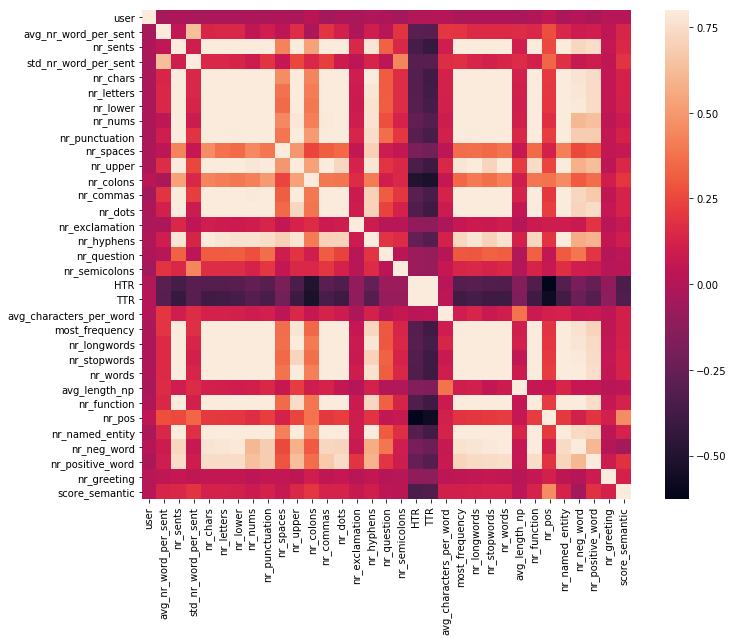

In [75]:
#correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

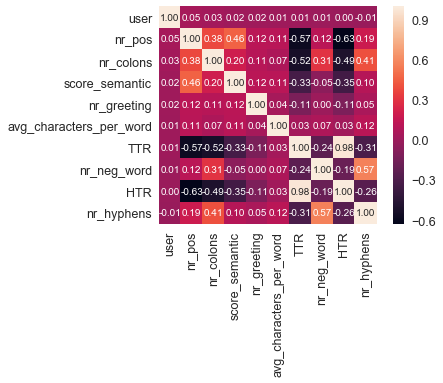

In [76]:
# correlation matrix with top k features
k = 10 
cols = corrmat.nlargest(k, 'user')['user'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

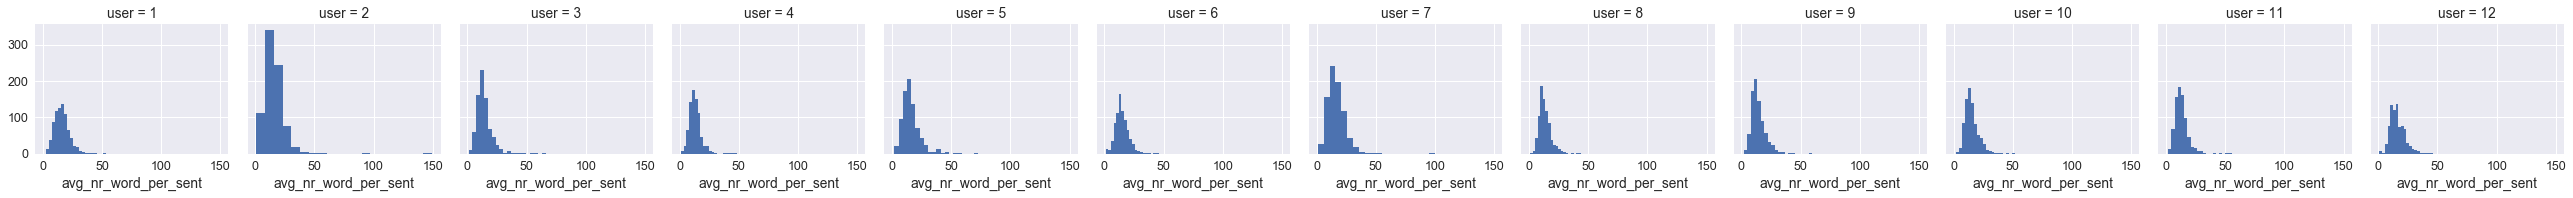

In [77]:
g = sns.FacetGrid(train_df, col='user')

g.map(plt.hist, 'avg_nr_word_per_sent', bins=20)

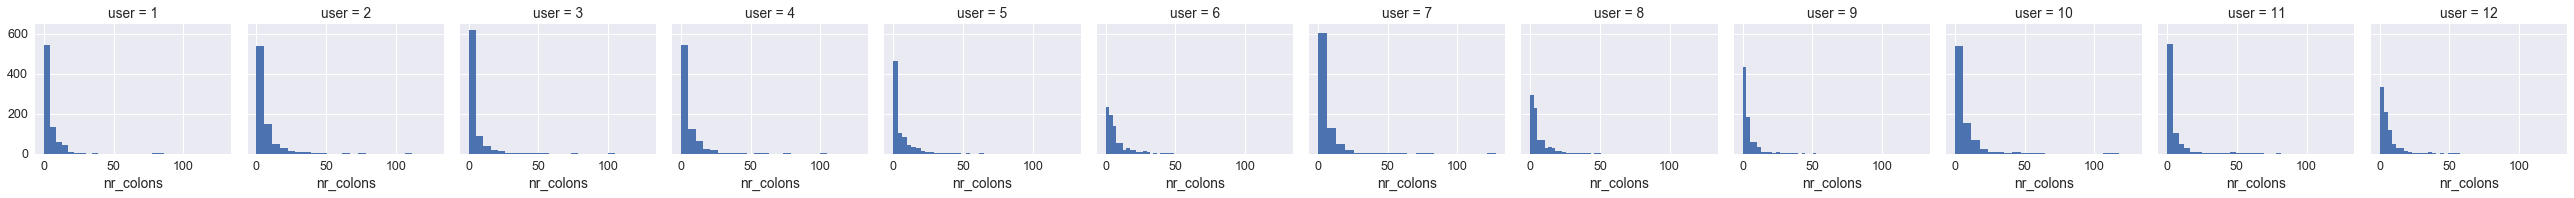

In [79]:
g = sns.FacetGrid(train_df, col='user')

g.map(plt.hist, 'nr_colons', bins=20)

In [80]:
train_df.describe()

,user,avg_nr_word_per_sent,nr_sents,std_nr_word_per_sent,nr_chars,nr_letters,nr_lower,nr_nums,nr_punctuation,nr_spaces,...,nr_stopwords,nr_words,avg_length_np,nr_function,nr_pos,nr_named_entity,nr_neg_word,nr_positive_word,nr_greeting,score_semantic
count,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,...,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000
mean,6.515625,14.945759,23.396250,11.651595,1476.110625,1216.362083,1086.572187,54.390521,122.909167,82.448854,...,87.560833,229.710417,11.180116,71.549479,14.192396,94.759583,0.415208,0.847604,0.039062,0.615985
std,3.450567,6.779188,54.945547,9.171703,4437.267091,3760.437372,3502.756023,188.835165,363.126576,423.999522,...,262.000326,665.316313,4.072223,210.341763,2.985775,278.456568,2.499275,2.834168,0.223234,0.447568
min,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.999500
25%,4.000000,10.582237,5.000000,7.287197,270.000000,216.000000,188.000000,7.000000,13.000000,13.000000,...,15.000000,44.000000,8.908741,13.000000,13.000000,16.000000,0.000000,0.000000,0.000000,0.400975
50%,7.000000,13.816498,13.000000,10.353781,690.000000,550.000000,479.000000,26.000000,49.000000,36.000000,...,39.000000,109.000000,10.885165,33.000000,15.000000,42.000000,0.000000,0.000000,0.000000,0.812600
75%,10.000000,17.960129,26.000000,14.247607,1515.250000,1229.000000,1076.000000,55.000000,128.250000,79.000000,...,92.000000,238.000000,13.000000,75.000000,16.000000,98.000000,0.000000,1.000000,0.000000,0.957125
max,12.000000,149.333333,2055.000000,341.881071,184911.000000,158282.000000,148497.000000,8210.000000,12217.000000,35618.000000,...,10268.000000,25833.000000,163.000000,8412.000000,17.000000,10732.000000,98.000000,78.000000,5.000000,1.000000


## Automatic classification 


### StandardScaler &  Minmax_scale

In [81]:
X = train_df.drop('user', axis=1)
y = train_df.user
sScaler = StandardScaler(copy=True, with_mean=True, with_std=True)

XScaled = minmax_scale((sScaler.fit_transform(X)), feature_range=(0, 1))
y_label = label_binarize(y, classes=list(range(1,13)))


In [82]:
X_test = test_df.drop('user', axis=1)
y_test = test_df.user
X_test_Scaled = minmax_scale((sScaler.fit_transform(X_test)), feature_range=(0, 1))


### Modling   with   Cross Validation

### KNeighbors

In [83]:
clf = KNeighborsClassifier(n_neighbors = 10,algorithm='ball_tree')
scores = cross_val_score(clf, XScaled, y_label, cv=5, scoring='roc_auc')
print("roc_auc: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

roc_auc: 0.6163 (+/- 0.0070)


In [84]:
clf = KNeighborsClassifier(n_neighbors = 50,algorithm='ball_tree')
scores = cross_val_score(clf, XScaled, y_label, cv=5, scoring='roc_auc')
print("roc_auc: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

roc_auc: 0.6283 (+/- 0.0037)


In [85]:
clf = KNeighborsClassifier(n_neighbors = 500,weights ='distance')
scores = cross_val_score(clf, XScaled, y_label, cv=5, scoring='roc_auc')
print("roc_auc: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

roc_auc: 0.6766 (+/- 0.0087)


In [86]:
clf = KNeighborsClassifier(n_neighbors = 100,weights ='distance')
scores = cross_val_score(clf, XScaled, y_label, cv=5, scoring='roc_auc')
print("roc_auc: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

roc_auc: 0.6811 (+/- 0.0044)


### Random Forest

In [87]:
clf = RandomForestClassifier(n_estimators=10) # random forest doesn't need scaler 
scores = cross_val_score(clf, X, y_label, cv=5, scoring='roc_auc')
print("roc_auc: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

roc_auc: 0.6757 (+/- 0.0091)


In [88]:
clf = RandomForestClassifier(n_estimators=50) 
scores = cross_val_score(clf, X, y_label, cv=5, scoring='roc_auc')
print("roc_auc: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

roc_auc: 0.7386 (+/- 0.0121)


In [89]:
clf = RandomForestClassifier(n_estimators=100) 
scores = cross_val_score(clf, X, y_label, cv=5, scoring='roc_auc')
print("roc_auc: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

roc_auc: 0.7518 (+/- 0.0097)


##  Use Random Forest for prediction

In [90]:
y_test.shape

(2400,)

In [91]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X, y)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 5)
acc_random_forest

34.041670000000003

In [92]:
print(Y_pred[:10])

[ 9  6  9 10  2  5  6  9 11  9]


In [93]:
print(y_test[:10])

1935     2
6494     7
1720     2
9120    10
360      1
9663    10
5277     6
8546     9
2221     3
4617     5
Name: user, dtype: int64


### Accuracy is only around 33%,  it might because of too many classes.

#### Try to get less classes for prediction

In [94]:
l = random.sample(range(1,13),3)
train_df_3 = train_df.loc[train_df['user'].isin(l)]
test_df_3 = test_df.loc[test_df['user'].isin(l)]
print(l)

[7, 12, 1]


In [95]:
X_3 = train_df_3.drop('user', axis=1)
y_3 = train_df_3.user
sScaler = StandardScaler(copy=True, with_mean=True, with_std=True)

XScaled_3 = minmax_scale((sScaler.fit_transform(X_3)), feature_range=(0, 1))

In [97]:
X_test_3 = test_df_3.drop('user', axis=1)
y_test_3 = test_df_3.user
X_test_Scaled_3 = minmax_scale((sScaler.fit_transform(X_test_3)), feature_range=(0, 1))

In [98]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_3, y_3)
Y_pred_3 = random_forest.predict_proba(X_test_3)
acc_random_forest = round(random_forest.score(X_test_3, y_test_3) * 100, 5)
acc_random_forest

57.11806

### Conclusions:  the accuracy of my model is around 33%, 4 times higher than random classification(8%). If I decrease the classes for prediction to 3 classes, the accuracy can reach around 60%, 2 times higher than random classification(33%). The main reason is all the features are not very relevant for predict user.
    

## Save the predictions of your model on the test data in a separate file

In [99]:
predict_df = pd.DataFrame({'Email_ID':y_test.index, 'Gold':y_test.values, 'Prediction':Y_pred})

In [100]:
predict_df.head()

,Email_ID,Gold,Prediction
0,1935,2,9
1,6494,7,6
2,1720,2,9
3,9120,10,10
4,360,1,2


In [101]:
predict_df.shape

(2400, 3)

In [108]:
predict_df.to_csv("../result/predictions_test_data.csv")